In [192]:
# load JSON
import json
import pandas as pd

df = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
df = df.sort_values(by=['ds'])

df1 = df

In [193]:
# Load the Pandas libraries with alias 'pd' 
df = pd.read_pickle('groundLevel/airQualityDataframe-ELYS.pkl')
df = df.sort_values(by=['ds'])

df2 = df
test = df2.y
test = test.astype(float)
df2.y = test

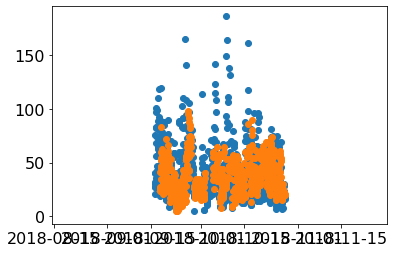

In [208]:
# merge two dataframes matching
df_merge = df1.merge(df2, left_on='ds', right_on='ds', how='inner')
df_merge_org = df_merge
df_merge = df_merge[50000:51000] # extract a small part

plt.scatter(df_merge['ds'],df_merge['y_x'])
plt.scatter(df_merge['ds'],df_merge['y_y'])
plt.autoscale(enable=True, axis='x', tight=True)

Text(0, 0.5, 'PM10,street')

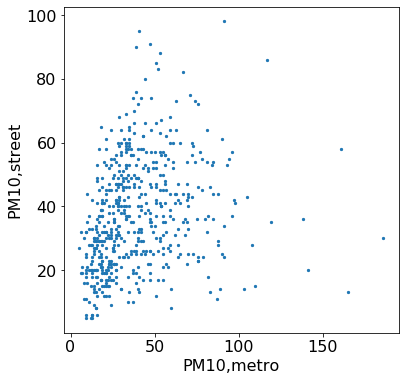

In [210]:
import matplotlib.pyplot as plt
import matplotlib

font = {'size': 16,             # font setting
       'weight':'normal'}       # font setting
matplotlib.rc('font', **font)   # font setting

plt.figure(figsize=(6, 6))
plt.scatter(df_merge['y_x'],df_merge['y_y'],5)
plt.xlabel('PM10,metro')
plt.ylabel('PM10,street')

In [211]:
# SARIMAX
import pmdarima as pm

df_merge = df_merge.dropna() # drop nan's (any rows with at least 1 NaN)

# SARIMAX Model
sxmodel = pm.auto_arima(df_merge[['y_x']], exogenous=df_merge[['y_y']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=4741.692, BIC=4767.430, Fit time=2.062 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=5224.601, BIC=5237.470, Fit time=0.090 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=4891.912, BIC=4913.360, Fit time=1.312 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=4808.999, BIC=4830.448, Fit time=1.531 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=4742.359, BIC=4772.387, Fit time=2.404 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=5039.011, BIC=5060.460, Fit time=0.788 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=4742.468, BIC=4772.496, Fit time=7.564 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=4745.376, BIC=4779.693, Fit time=19.213 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=4736.331, BIC=4766.359, Fit time=3.777 seconds
Fit ARIMA: order=(2, 0, 0) 

In [212]:
# ARIMAX model summary
sxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  551
Model:             SARIMAX(3, 0, 2)x(0, 1, 1, 12)   Log Likelihood               -2357.481
Date:                            Tue, 24 Sep 2019   AIC                           4732.962
Time:                                    13:23:58   BIC                           4771.569
Sample:                                         0   HQIC                          4748.062
                                            - 551                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2363      0.154     -1.534      0.125      -0.538       0.066
x1             0.1135      0.078      1.454      0.146      -0.040       0.267
ar.L1          0.7738      0.065     11.906      0.000       0.646       0.901
ar.L2         -0.9209      0.073    -12.610      0.000      -1.064      -0.778
ar.L3          0.5230      0.049     10.686      0.000       0.427       0.619
ma.L1         -0.1822      0.064     -2.843      0.004      -0.308      -0.057
ma.L2          0.9179      0.047     19.402      0.000       0.825       1.011
ma.S.L12      -0.9903      0.136     -7.274      0.000      -1.257      -0.723
sigma2       341.2227     45.399      7.516      0.000     252.243     430.202
===================================================================================
Ljung-Box (Q):                       44.54   Jarque-Bera (JB):              3953.40
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [218]:
# Forecast
import numpy as np
n_periods = 50
df_merge_fcst = df_merge_org[201:251]

[[-14.12555348  58.77485057]
 [-16.73809336  67.95560455]
 [-21.13165356  69.8196572 ]
 [-17.59260063  76.48791006]
 [-16.08060713  78.60009143]
 [-16.26685102  78.47557569]
 [-18.55278676  76.34496886]
 [-17.04559441  78.08268323]
 [-16.74564916  78.40180166]
 [-16.60030133  78.56356353]
 [-18.7737177   76.38925869]
 [-20.84865002  74.35561832]
 [-17.08794773  78.15030893]
 [-15.36114768  79.8675412 ]
 [-19.92742685  75.30124294]
 [-17.69658915  77.55468687]
 [-18.12344246  77.13550269]
 [-18.00235581  77.26149142]
 [-20.64234842  74.62456458]
 [-19.39411981  75.87719836]
 [-19.56061135  75.71514166]
 [-19.69801011  75.57899667]
 [-22.17776205  73.10112214]
 [-22.90300281  72.37430823]
 [-20.38398927  74.91980645]
 [-18.15129192  77.14311892]
 [-20.21108327  75.08339814]
 [-17.65134868  77.6451397 ]
 [-17.11073275  78.18887582]
 [-16.76738632  78.53225176]
 [-18.73650682  76.56354256]
 [-17.35640453  77.94363355]
 [-19.72554334  75.57528985]
 [-18.85850166  76.44203756]
 [-20.99521577

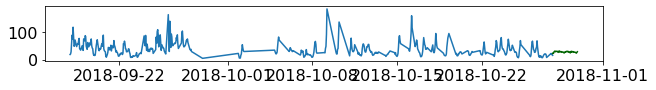

In [219]:
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=df_merge_fcst[['y_y']],
                                  return_conf_int=True)

index_of_fc = pd.date_range(df_merge.iloc[-1].ds, periods = n_periods, freq='H')
print(confint)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
#print(fitted_series)
plt.figure(figsize=(10,1))
plt.plot(df_merge['ds'],df_merge['y_x'])
#df_merge_fcst['fitted'] = fitted_series
#plt.figure(figsize=(10,1))
plt.plot(fitted_series, color='darkgreen')#,marker="o")
#plt.fill_between(lower_series.index, 
#                 lower_series, 
#                 upper_series, 
#                 color='k', alpha=.15)

#plt.title("SARIMAX Forecast of a10 - Drug Sales")
#plt.show()